In [10]:
import easyocr
import cv2
from matplotlib import pyplot as plt
from IPython.display import display, Image

In [2]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [3]:
#reading the image
marksheet1 = cv2.imread("./Sal1.png")
marksheet2 = cv2.imread("./Sal2.png")

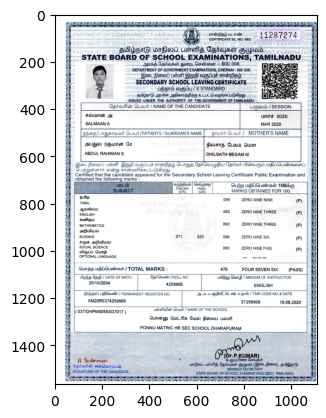

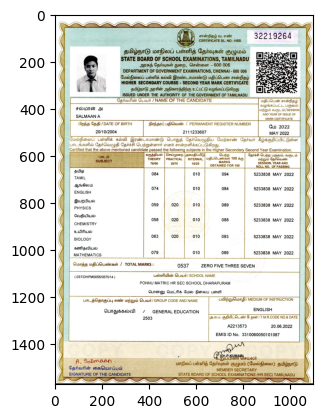

In [11]:
plt.imshow(marksheet1)
plt.show()
plt.imshow(marksheet2)
plt.show()

In [12]:
def easyocr_predicted(img):
    image_text =  reader.readtext(img) # it takes 1 minutes 35 seconds
    print(image_text)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    font = cv2.FONT_HERSHEY_SIMPLEX
    for detection in image_text:
        top_left = (int(detection[0][0][0]),int(detection[0][0][1])) # to solve the error of float
        bottom_right = (int(detection[0][2][0]),int(detection[0][2][1])) #(362.3358994113243, 251.50384911698646) (418.6641005886757, 271.4961508830135)
        # print(top_left,bottom_right)
        text = detection[1]
        img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
        img = cv2.putText(img,text,top_left, font, 2,(255,0,0),5,cv2.LINE_AA)
    plt.imshow(img)
    plt.show()
    return image_text

In [13]:
def main_ocr(img):
    output_text = easyocr_predicted(img)
    result="" # an empty string
    for single_output in output_text:
        #structure of single_output ->  ([[681, 314], [1603, 314], [1603, 527], [681, 527]], 'BANNARI', 0.9994982510354642)
        # a tuple -> 0th index-coordinates(top_right,top_left,bottom_right,bottom_left)
        #1st index - predicted text
        #2nd or last index -> confidence score
        if single_output[-1] > 0.5:
            result += single_output[1]+'\n'
    return result

[([[74, 74], [398, 74], [398, 100], [74, 100]], 'PWmo GO EnreN', 0.001688459269972114), ([[648, 74], [796, 74], [796, 100], [648, 100]], 'Gibordfeyp 61. 6T6oor', 0.13703309071460681), ([[861, 71], [1029, 71], [1029, 109], [861, 109]], '11287274', 0.9999967968373882), ([[649, 99], [797, 99], [797, 115], [649, 115]], 'CERTIFICATE SL: NO.', 0.6108849782951405), ([[801, 101], [833, 101], [833, 115], [801, 115]], 'SEC', 0.9996044014223734), ([[120, 112], [222, 112], [222, 136], [120, 136]], '~vro', 0.0234975628554821), ([[267, 133], [888, 133], [888, 176], [267, 176]], '501606) prflou U6roflg 8gi6486r (G(lLD', 0.024095235025698793), ([[109, 162], [1045, 162], [1045, 205], [109, 205]], 'STATE BOARD OF SCHOOL EXAMINATIONS, TAMILNADU', 0.6654971967635189), ([[370, 198], [684, 198], [684, 226], [370, 226]], '9168 65i6486it g160@, O86016060r', 0.0811560408237517), ([[702, 198], [784, 198], [784, 222], [702, 222]], '600 006', 0.6407712254401012), ([[323, 224], [828, 224], [828, 248], [323, 248]],

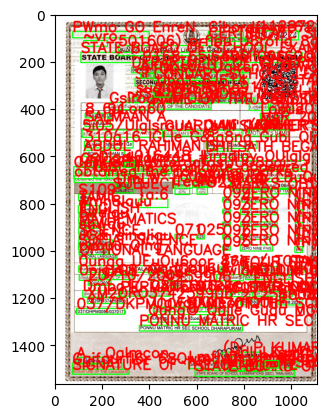

In [14]:
marksheet1_texts = main_ocr(marksheet1)

[([[608, 80], [756, 80], [756, 106], [608, 106]], '8ieordgyj 6. 6r6dor', 0.1011086045315802), ([[839, 70], [1009, 70], [1009, 112], [839, 112]], '32219264', 0.7445869849509327), ([[609, 103], [791, 103], [791, 123], [609, 123]], 'CERTIFICATE SL. NO : HSS', 0.8167846004634636), ([[285, 136], [819, 136], [819, 186], [285, 186]], 'Sulipgn6) wmflau Uorronlg Gsioys6n G(ouLb', 0.027599052290120014), ([[275, 173], [831, 173], [831, 209], [275, 209]], 'STATE BOARD OF SCHOOL EXAMINATIONS; TAMILNADU', 0.7832194238731748), ([[358, 204], [658, 204], [658, 232], [358, 232]], '91168 6gio486i g160@ ,  Q86ot6o6or', 0.1315485629610186), ([[670, 204], [746, 204], [746, 228], [670, 228]], '600 006', 0.9628840508119854), ([[286, 230], [818, 230], [818, 256], [286, 256]], 'DEPARTMENT OF GOVERNMENT EXAMINATIONS; CHENNAI - 600 006', 0.724440402711271), ([[274, 254], [828, 254], [828, 286], [274, 286]], 'Gwsudlsoouus Uorofle s66] @roooi_TlroooG) uEuQuowr &ioodlg@', 0.0015639334622308606), ([[278, 278], [528, 

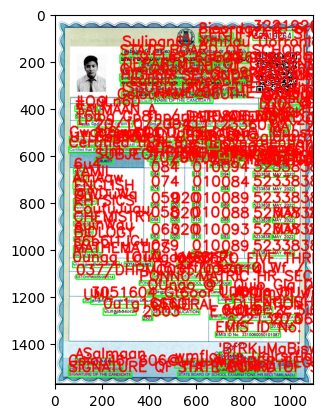

In [109]:
marksheet2_texts = main_ocr(marksheet2)

In [15]:
print(marksheet1_texts)

11287274
CERTIFICATE SL: NO.
SEC
STATE BOARD OF SCHOOL EXAMINATIONS, TAMILNADU
600 006
DEPARTMENT OF GOVERNMENT EXAMINATIONS, CHENNAI - 600 006
SECONDARY SCHOOL LEAVING CERTIFICATE
NAME OF THE CANDIDATE
SESSION
91
2020
SALMAAN A
MAR 2020
GUARDIAN'S NAME
MOTHER'S NAME
ABDUL RAHIMAN S
DHILSATH BEGAM M
that the candidate appeared for the Secondary School Leaving Certificate Public Examination and
obtained the following marks
SUBJECT
MARKS OBTAINED FOR 100
099
ZERO NINE NINE
(P)
TAMIL
093
ZERO NINE THREE
(P)
ENGLISH
MATHEMATICS
093
ZERO NINE THREE
(P)
SCIENCE
071
025
096
ZERO NINE SiX
(P)
SOCIAL SCIENCE
095
ZERO NINE FIVE
(P)
OPTIONAL LANGUAGE
476
FOUR SEVEN SIX
(PASS)
DATE OF BiRTH
MEDIUM OF INSTRUCTION
20/10/2004
4259906
ENGLISH
PERMANENT REGISTER NO
TMR CODE NO.& DATE
XM2ORO374259906
21258808
10.08.2020
037/DKPMO055/037017
NAME OF THE SCHOOL
PONNU MATRIC HR SEC SCHOOL DHARAPURAM
(Dr P KUMAR)
MEMBER SECRETARY
SIGNATURE OF THE CANDIDATE
STATE BOARD OF SCHOOL EXAMINATIONS (SEC) , TAMILNADU

In [110]:
print(marksheet2_texts)

32219264
CERTIFICATE SL. NO : HSS
STATE BOARD OF SCHOOL EXAMINATIONS; TAMILNADU
600 006
DEPARTMENT OF GOVERNMENT EXAMINATIONS; CHENNAI - 600 006
HIGHER SECONDARY COURSE
SECOND YEAR MARK CERTIFICATE
NAME OF THE CANDIDATE
9
AND YEAR OF ISSUE OF
SALMAAN A
MARK CERIIFICATE
PERMANENT REGISTER NUMBER
Cw 2022
20/10/2004
2111233607
MAY 2022
THEORY
PRACTICAL
INTERNAL
70/90
20775
10/25
MARKS
SESSION; YEAR AND
OBTAINED FOR 100
ROLLNO;
OF PASSING
084
010
094
5233838 MAY 2022
TAMIL
074
010
084
5233838 MAY 2022
ENGLISH
059
020
010
089
5233838 MAY 2022
PHYSICS
058
020
010
088
5233838
MAY 2022
CHEMISTRY
063
020
010
093
5233838
MAY 2022
BIOLOGY
MATHEMATICS
079
010
089
5233838 MAY 2022
TOTAL MARKS
0537
ZERO FIVE THREE SEVEN
037/DHPMO055/037014
GENERAL EDUCATION
ENGLISH
2503
A2213573
20.06.2022
EMIS ID No. 3310060050101087
A_
Salmaan
MeMBER SECRETARY
SIGNATURE QF THE CANDIDATE
STATE BOARD OF SCHOOL EXAMINATIONS (HR.SEC) TAMILNADU
Qudd
66



In [21]:
import re

In [170]:
def hsc(sheet_data):
    #if one is missed katham
    tamil = re.findall(r'(TAMIL)\n',sheet_data,flags=re.MULTILINE) # conflicts with Tamil Nadu
    english = re.findall(r'ENGLISH',sheet_data,flags=re.MULTILINE)  # we can get the medium from this also
    tamil_marks = re.findall(r'^(\d{3})\n',sheet_data,flags=re.MULTILINE)[:3] # 1st - external 2nd - internal 3rd total
    english_marks = re.findall(r'^(\d{3})\n',sheet_data,flags=re.MULTILINE)[3:6]  # 1st - external 2nd - internal 3rd total
    maths_marks = re.findall(r'^(\d{3})\n',sheet_data,flags=re.MULTILINE)[-3:]#1st - external 2nd - internal 3rd total
    physics_marks = re.findall(r'^(\d{3})\n',sheet_data,flags=re.MULTILINE)[6:10] ##1st - external 2nd-practicals 3rd - internal 4th total
    chemistry_marks = re.findall(r'^(\d{3})\n',sheet_data,flags=re.MULTILINE)[10:14] ##1st - external 2nd-practicals 3rd - internal 4th total
    biology_marks = re.findall(r'^(\d{3})\n',sheet_data,flags=re.MULTILINE)[14:18] ##1st - external 2nd-practicals 3rd - internal 4th total
    
    # optional = re.findall(r'OPTIONAL LANGUAGE',sheet_data) #
    #name 
    name = re.findall(r'NAME OF THE CANDIDATE([^ ]+.*\n([^ ]+.*))',sheet_data,flags=re.MULTILINE)[0] #
    # print(name) #('','','')
    name = name[-1]
    
    # find the medium of instruction
    if len(english) >0:
        medium = english[0]
    elif len(tamil)>0:
        medium = tamil[0]
    
    #name of the school
    # school = re.findall(r'NAME OF THE SCHOOL\n(.*)|SCHOOL NAME\n(.*)',sheet_data,flags=re.MULTILINE)[0] #

    #BOARD OF SCHOOL - SEC/CBSE
    board =  re.findall(r'STATE BOARD OF SCHOOL EXAMINATIONS',sheet_data,flags=re.MULTILINE)[0]

    #total
    total = re.findall(r'TWO.*|THREE.*|FOUR.*|FIVE.*|SIX.*',sheet_data,flags=re.MULTILINE)[0]

    #permanent register number
    prn = re.findall(r'^(\d{10})\n',sheet_data,flags=re.MULTILINE)[0]
    #roll no
    roll = re.findall(r'^(\d{7})\n',sheet_data,flags=re.MULTILINE)[0]
    #session  
    session = re.findall(r'^\D{3} \d{4}',sheet_data,flags=re.MULTILINE)[0]
    #dob
    dob = re.findall(r'\d{2}\/\d{2}\/\d{4}',sheet_data,flags=re.MULTILINE)[0]

    #certificate no
    cno = re.findall(r'^(\d{8})\n',sheet_data,flags=re.MULTILINE)[0]

    # print(tamil,english,maths,science,social,medium,school)
    
    print(
        f"""
    ------------ SECONDARY SCHOOL LEAVING CERTIFICATE --------------
    CERTIFICATE NO    : {cno} 
    ---------------------------
    Name              : {name}
    Roll.No           : {roll}
    Standard          : XII
    Board             : {board}
    Medium            : {medium}
    Per.Reg.No        : {prn}
    Session           : {session}
    D.O.B             : {dob}
    
    ------------ Marks --------------
    Tamil             : Total- {tamil_marks[-1]}, Split Up -{tamil_marks[:-1]}
    English           : Total- {english_marks[-1]}, Split Up -{english_marks[:-1]}
    Mathematics       : Total- {maths_marks[-1]}, Split Up -{maths_marks[:-1]}
    Physics           : Total- {physics_marks[-1]}, Split Up -{physics_marks[:-1]}
    Chemistry         : Total- {chemistry_marks[-1]}, Split Up -{chemistry_marks[:-1]}
    Biology           : Total- {biology_marks[-1]}, Split Up -{biology_marks[:-1]}
    Total             : {get_numbers(total)} - {total}
        """
    )


In [157]:
def get_numbers(mark):
    # Dictionary mapping words to integers
    word_to_number = {
        'ZERO': '0',
        'ONE': '1',
        'TWO': '2',
        'THREE': '3',
        'FOUR': '4',
        'FIVE': '5',
        'SIX': '6',
        'SEVEN': '7',
        'EIGHT': '8',
        'NINE': '9'
    }
    
    marks = mark.split(' ')
    temp = ''
    for word in marks:
        word = word.upper()
        if word in word_to_number:
            temp += word_to_number[word]
    return temp
        

In [160]:
def sslc_marks(sheet_data):
    tamil = re.findall(r'(TAMIL)\n',sheet_data,flags=re.MULTILINE) # conflicts with Tamil Nadu
    english = re.findall(r'ENGLISH',sheet_data,flags=re.MULTILINE)  # we can get the medium from this also
    maths = re.findall(r'MATHEMATICS',sheet_data,flags=re.MULTILINE)[0]#
    science = re.findall(r'^SCIENCE',sheet_data,flags=re.MULTILINE)[0] #
    social = re.findall(r'SOCIAL SCIENCE',sheet_data,flags=re.MULTILINE)[0] #
    
    # optional = re.findall(r'OPTIONAL LANGUAGE',sheet_data) #
    #name 
    name = re.findall(r'NAME OF THE CANDIDATE([^ ]+.*)',sheet_data,flags=re.MULTILINE)[0] #
    name = name.split('\n')[-1]
    
    # find the medium of instruction
    if len(english) >0:
        medium = english[0]
    elif len(tamil)>0:
        medium = tamil[0]
    
    #name of the school
    school = re.findall(r'NAME OF THE SCHOOL\n(.*) ',sheet_data,flags=re.MULTILINE)[0] #

    #BOARD OF SCHOOL - SEC/CBSE
    board =  re.findall(r'SEC|CBSE',sheet_data,flags=re.MULTILINE)[0]
    
    #cleared
    clear = re.findall(r'PASS|FAIL',sheet_data,flags=re.MULTILINE)[0]
    #marks 
    marks =  re.findall(r'^ZERO.*|^ONE.*',sheet_data,flags=re.MULTILINE)
    #total
    total = re.findall(r'^TWO.*|^THREE.*|^FOUR.*|^FIVE.*',sheet_data,flags=re.MULTILINE)[0]

    #permanent register number
    prn = re.findall(r'^XM.*',sheet_data,flags=re.MULTILINE)[0]
    #roll no
    roll = re.findall(r'^(\d{7})\n',sheet_data,flags=re.MULTILINE)[0]
    #session  
    session = re.findall(r'^\D{3} \d{4}',sheet_data,flags=re.MULTILINE)[0]
    #dob
    dob = re.findall(r'\d{2}\/\d{2}\/\d{4}',sheet_data,flags=re.MULTILINE)[0]

    #certificate no
    cno = re.findall(r'^(\d{8})\n',sheet_data,flags=re.MULTILINE)[0]

    # print(tamil,english,maths,science,social,medium,school)
    
    print(
        f"""
    ------------ SECONDARY SCHOOL LEAVING CERTIFICATE --------------
    CERTIFICATE NO    : {cno} 
    ---------------------------
    Name              : {name}
    Roll.No           : {roll}
    Standard          : X
    Board             : {board}
    Medium            : {medium}
    School Name       : {school}
    Per.Reg.No        : {prn}
    Session           : {session}
    D.O.B             : {dob}
    
    ------------ Marks --------------
    
    Tamil             : {get_numbers(marks[0])} - {marks[0]}
    English           : {get_numbers(marks[1])} - {marks[1]}
    Mathematics       : {get_numbers(marks[2])} - {marks[2]}
    Science           : {get_numbers(marks[3])} - {marks[3]}
    Social Science    : {get_numbers(marks[4])} - {marks[4]}
    Total             : {get_numbers(total)} - {total}
    Pass/Fail         : {clear}
        """
    )


In [137]:
def marks(sheet_data):
    ten_twe =  re.findall(r'SECONDARY SCHOOL LEAVING CERTIFICATE|HIGHER SECONDARY COURSE',sheet_data,flags=re.MULTILINE)[0]
    if ten_twe =='SECONDARY SCHOOL LEAVING CERTIFICATE':
        sslc_marks(sheet_data)
    elif ten_twe =='HIGHER SECONDARY COURSE':
        hsc(sheet_data)

In [161]:
marks(marksheet1_texts)


    ------------ SECONDARY SCHOOL LEAVING CERTIFICATE --------------
    CERTIFICATE NO    : 11287274 
    ---------------------------
    Name              : SALMAAN A
    Roll.No           : 4259906
    Standard          : X
    Board             : SEC
    Medium            : ENGLISH
    School Name       : PONNU MATRIC HR SEC SCHOOL
    Per.Reg.No        : XM2ORO374259906
    Session           : MAR 2020
    D.O.B             : 20/10/2004
    
    ------------ Marks --------------
    
    Tamil             : 099 - ZERO NINE NINE
    English           : 093 - ZERO NINE THREE
    Mathematics       : 093 - ZERO NINE THREE
    Science           : 096 - ZERO NINE SiX
    Social Science    : 095 - ZERO NINE FIVE
    Total             : 476 - FOUR SEVEN SIX
    Pass/Fail         : PASS
        


In [171]:
marks(marksheet2_texts)


    ------------ SECONDARY SCHOOL LEAVING CERTIFICATE --------------
    CERTIFICATE NO    : 32219264 
    ---------------------------
    Name              : SALMAAN A
    Roll.No           : 5233838
    Standard          : XII
    Board             : STATE BOARD OF SCHOOL EXAMINATIONS
    Medium            : ENGLISH
    Per.Reg.No        : 2111233607
    Session           : MAY 2022
    D.O.B             : 20/10/2004
    
    ------------ Marks --------------
    Tamil             : Total- 094, Split Up -['084', '010']
    English           : Total- 084, Split Up -['074', '010']
    Mathematics       : Total- 089, Split Up -['079', '010']
    Physics           : Total- 089, Split Up -['059', '020', '010']
    Chemistry         : Total- 088, Split Up -['058', '020', '010']
    Biology           : Total- 093, Split Up -['063', '020', '010']
    Total             : 537 - FIVE THREE SEVEN
        
